タイタニックデータを用いたデータ処理

In [1]:
#from モジュール名 import クラス名（もしくは関数名や変数名）
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# titanic data csvファイルの読み込み
titanic_df = pd.read_csv("./titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
#予測に不要と考えるcolumnをドロップ 
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [5]:
# 平均年齢（男女別）
age_male_mean = titanic_df[titanic_df["Sex"] == "male"]['Age'].mean()
age_female_mean = titanic_df[titanic_df["Sex"] == "female"]['Age'].mean()
print(age_male_mean, age_female_mean)

30.72664459161148 27.915708812260537


In [6]:
titanic_df['AgeSex'] = titanic_df.apply(lambda x: age_male_mean if x['Sex']=="male" else age_female_mean, axis=1)
titanic_df['AgeFill'] = titanic_df.apply(lambda x: x['Age'] if x['Age'] > 0 else x['AgeSex'], axis=1)

titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeSex,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,30.726645,30.726645
17,1,2,male,NaN,0,0,13.0000,S,30.726645,30.726645
19,1,3,female,NaN,0,0,7.2250,C,27.915709,27.915709
26,0,3,male,NaN,0,0,7.2250,C,30.726645,30.726645
28,1,3,female,NaN,0,0,7.8792,Q,27.915709,27.915709
29,0,3,male,NaN,0,0,7.8958,S,30.726645,30.726645
31,1,1,female,NaN,1,0,146.5208,C,27.915709,27.915709
32,1,3,female,NaN,0,0,7.7500,Q,27.915709,27.915709
36,1,3,male,NaN,0,0,7.2292,C,30.726645,30.726645
42,0,3,male,NaN,0,0,7.8958,C,30.726645,30.726645


In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeSex,AgeFill
0,0,3,male,22.0,1,0,7.2500,S,30.726645,22.0
1,1,1,female,38.0,1,0,71.2833,C,27.915709,38.0
2,1,3,female,26.0,0,0,7.9250,S,27.915709,26.0
3,1,1,female,35.0,1,0,53.1000,S,27.915709,35.0
4,0,3,male,35.0,0,0,8.0500,S,30.726645,35.0


チケット価格から生死を判別

In [8]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values
data1[:10]

array([[ 7.25  ],
       [71.2833],
       [ 7.925 ],
       [53.1   ],
       [ 8.05  ],
       [ 8.4583],
       [51.8625],
       [21.075 ],
       [11.1333],
       [30.0708]])

In [9]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [10]:
model.fit(data1, label1)

c:\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [11]:
data1.mean()

32.204207968574636

In [12]:
# 分類結果を表示
model.predict([[data1.mean()]])

array([0], dtype=int64)

In [13]:
# 分類結果を出す前の確率を表示
model.predict_proba([[data1.mean()]])

array([[0.61109599, 0.38890401]])

In [14]:
X_test_value = model.decision_function(data1)
X_test_value[:10]

array([-0.83114216,  0.14195026, -0.82088442, -0.13437521, -0.81898483,
       -0.81278004, -0.15318108, -0.62104831, -0.77212897, -0.48434218])

In [15]:
print (model.intercept_)#切片
print (model.coef_)#傾き

[-0.94131796]
[[0.01519666]]


No handles with labels found to put in legend.


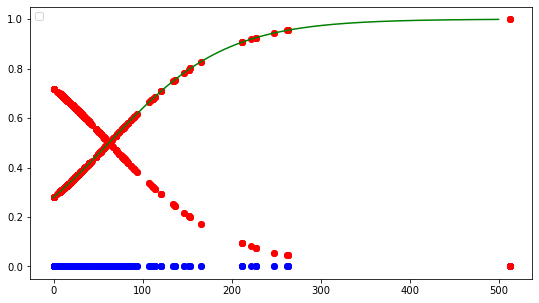

In [16]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]

def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)

plt.figure(figsize=(9,5))
plt.legend(loc=2)

plt.plot(data1,np.zeros(len(data1)), 'o', color="b")
plt.plot(data1, model.predict_proba(data1), 'o', color="r")
plt.plot(x_range, sigmoid(x_range), '-', color="g")

2変数から生死を判別

In [17]:
#性別の2値化
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeSex,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,30.726645,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,27.915709,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,27.915709,26.0,0


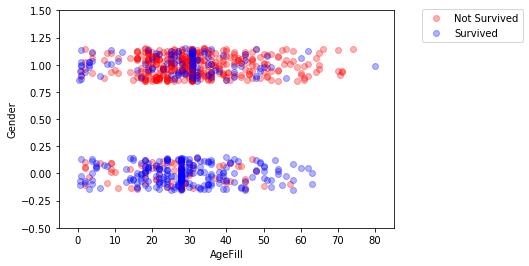

In [18]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = -0.5, 1.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
# cm = plt.cm.RdBu#カラーマップ
#cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Gender']+(np.random.rand(len(index_survived))-0.5)*0.3,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.3,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03)) #凡例の位置

In [19]:
data2 = titanic_df.loc[:, ["AgeFill", "Gender"]].values
data2

array([[22.        ,  1.        ],
       [38.        ,  0.        ],
       [26.        ,  0.        ],
       ...,
       [27.91570881,  0.        ],
       [26.        ,  1.        ],
       [32.        ,  1.        ]])

In [20]:
label2 =  titanic_df.loc[:,["Survived"]].values
model2 = LogisticRegression()

In [21]:
model2.fit(data2, label2)

c:\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [22]:
model2.predict([[10,1]])

array([0], dtype=int64)

In [23]:
model2.predict_proba([[10,1]])

array([[0.78793634, 0.21206366]])

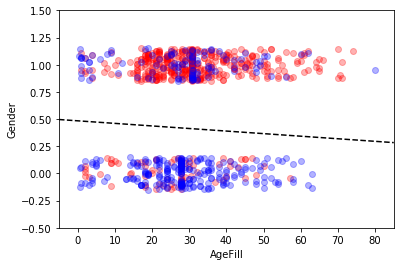

In [24]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = -0.5, 1.5
# np.meshgrid 配列の要素から格子列を生成する
# xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
# Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
# levels = np.linspace(0, 1.0)
# cm = plt.cm.RdBu
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Gender']+(np.random.rand(len(index_survived))-0.5)*0.3,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.3,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

混同行列とクロスバリデーション

In [25]:
from sklearn.model_selection import train_test_split
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape

(712, 1)

In [26]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape

(712, 2)

In [27]:
label =  titanic_df.loc[:,["Survived"]].values

In [28]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)

c:\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\python\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
# モデル1のスコア
print(eval_model1.score(traindata1, trainlabel1))
print(eval_model1.score(testdata1,testlabel1))

0.6685393258426966
0.6480446927374302


In [30]:
# モデル2のスコア
print(eval_model2.score(traindata2, trainlabel2))
print(eval_model2.score(testdata2,testlabel2))

0.800561797752809
0.7318435754189944


In [31]:
from sklearn import metrics
# 適合率,再現率,F1スコア,正解率,マクロ平均，マイクロ平均を算出してくれる
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       112
           1       0.58      0.21      0.31        67

    accuracy                           0.65       179
   macro avg       0.62      0.56      0.54       179
weighted avg       0.63      0.65      0.59       179

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       108
           1       0.65      0.72      0.68        71

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.74      0.73      0.73       179



In [32]:
from sklearn.metrics import confusion_matrix
# TN FP  真陰性 偽陽性
# FN TP  偽陰性 真陽性
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)
print(confusion_matrix1)
print(confusion_matrix2)

[[102  10]
 [ 53  14]]
[[80 28]
 [20 51]]


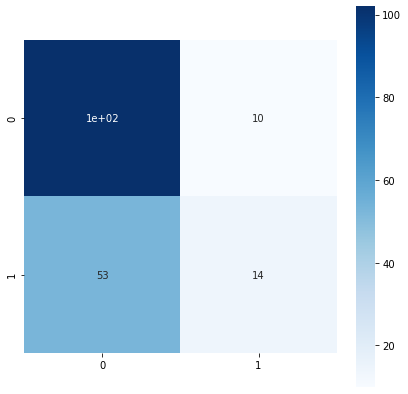

In [33]:
# モデル1の混合行列可視化
fig = plt.figure(figsize = (7,7))
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    mask=None)

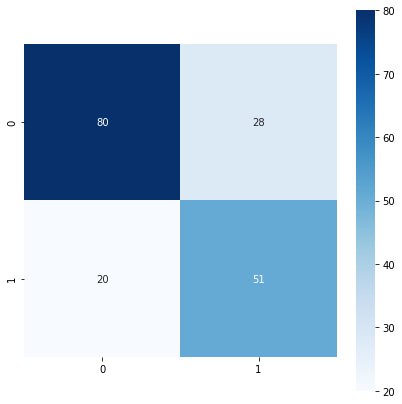

In [34]:
fig = plt.figure(figsize = (7,7))
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    mask=None)

c:\python\python37\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


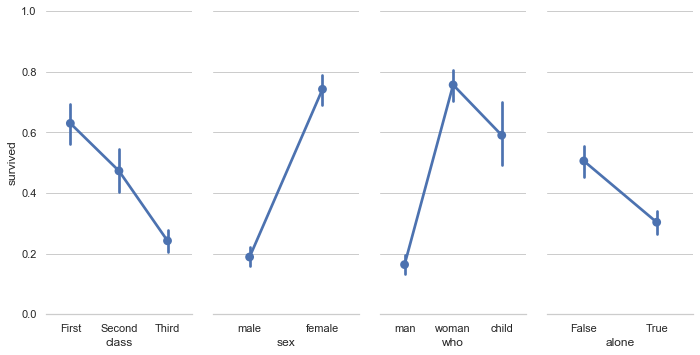

In [35]:

import seaborn as sns
sns.set(style="whitegrid")

# seabornサンプル用のデータセット
titanic = sns.load_dataset("titanic")
# 4つのグリッドグラフ表示
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color="b")
g.set(ylim=(0, 1)) #Y軸上下限
sns.despine(fig=g.fig, left=True) # 左軸除去

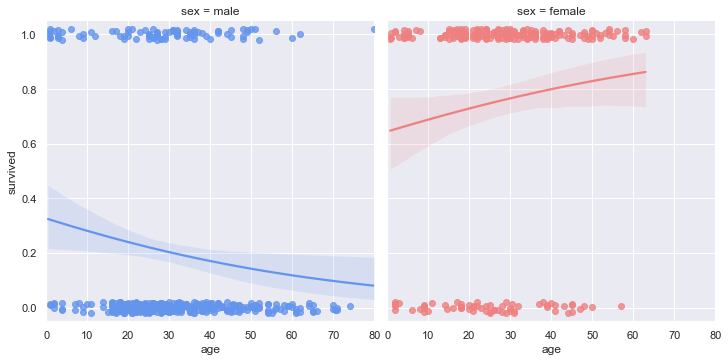

In [36]:
import seaborn as sns
sns.set(style="darkgrid")

pal = dict(male="#6495ED", female="#F08080")

# 回帰モデルの可視化とグリッドによる表示
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=titanic,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
# 男性は若いほど生き残り、女性は高齢ほど生き残る傾向？